[![Abrir en Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/17ugPHmH12ky5X1mtdZc4gBcPV8HZhZ7K?usp=sharing)


# **Challenge Alura Store**


In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

urls = {
    "Tienda 1": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv",
    "Tienda 2": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv",
    "Tienda 3": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv",
    "Tienda 4": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"
}



In [73]:
def leer_csv(url):
  return pd.read_csv(url, encoding="utf-8", engine="python")
dfs = []
for tienda, url in urls.items():
  tmp = leer_csv(url)
  tmp['Tienda'] = tienda
  dfs.append(tmp)

df_all = pd.concat(dfs, ignore_index=True)

In [56]:
def to_float(s):
  return (s.astype(str)
          .str.replace(r"[^\d\.,-]","", regex=True)
          .str.replace(",", ".", regex=True)
          .astype(float))


In [76]:
if "Precio" in df_all.columns:
  df_all["Precio"] = to_float(df_all['Precio'])
else:
  raise ValueError("No sé encontró la columna 'Precio'.")

if "Costo de envío" in df_all.columns:
  df_all["Costo de envío"] = to_float(df_all['Costo de envío'])
else:
  df_all["Costo de envío"] = 0.0

if "Calificación" in df_all.columns:
  df_all["Calificación"] = to_float(df_all["Calificación"])
else:
  df_all["Calificación"] = np.nan

In [94]:
# KPIs por Tienda
kpis_tienda = (
    df_all.groupby("Tienda")
      .agg(
          ingreso_total=("Precio","sum"),
          costo_envio_promedio=("Costo de envío","mean"),
          costo_envio_total=("Costo de envío", "sum"),
          calificacion_promedio=("Calificación","mean"),
          ventas_registros=("Producto","count") # Numero filas: ventas
      )
      .reset_index()
)

In [96]:
# Ganancia neta = ingreso_total - costo_envio_total
kpis_tienda["ganancia_neta"] = kpis_tienda["ingreso_total"] - kpis_tienda["costo_envio_total"]

In [97]:
def peso(x): return f"${x:,.2f}"
resumen_legible = kpis_tienda.copy()
for col in ["ingreso_total","costo_envio_promedio","costo_envio_total","ganancia_neta"]:
    resumen_legible[col] = resumen_legible[col].apply(peso)
resumen_legible["calificacion_promedio"] = resumen_legible["calificacion_promedio"].round(2)

print("📊 KPIs por Tienda:")
display(resumen_legible)

📊 KPIs por Tienda:


,Tienda,ingreso_total,costo_envio_promedio,costo_envio_total,calificacion_promedio,ventas_registros,ganancia_neta
0,Tienda 1,"$1,150,880,400.00","$26,018.61","$61,377,900.00",3.98,2359,"$1,089,502,500.00"
1,Tienda 2,"$1,116,343,500.00","$25,216.24","$59,485,100.00",4.04,2359,"$1,056,858,400.00"
2,Tienda 3,"$1,098,019,600.00","$24,805.68","$58,516,600.00",4.05,2359,"$1,039,503,000.00"
3,Tienda 4,"$1,038,375,700.00","$23,459.46","$55,317,400.00",4.00,2358,"$983,058,300.00"


## Ventas por Categoría y Producto

In [98]:
cat_resumen = (
    df_all.groupby(["Tienda","Categoría del Producto"])
      .agg(
          cantidad_vendidad=("Producto","count"),
          ingreso_total=("Precio","sum")
      )
      .reset_index()
)

print("📦 Resumen por Categoría (ejemplo 8 filas):")
display(cat_resumen.sort_values(["Tienda","ingreso_total"], ascending=[True,False]).head(8))

📦 Resumen por Categoría (ejemplo 8 filas):


,Tienda,Categoría del Producto,cantidad_vendidad,ingreso_total
3,Tienda 1,Electrónicos,448,429493500.0
2,Tienda 1,Electrodomésticos,312,363685200.0
7,Tienda 1,Muebles,465,187633700.0
4,Tienda 1,Instrumentos musicales,182,91299000.0
1,Tienda 1,Deportes y diversión,284,39290000.0
5,Tienda 1,Juguetes,324,17995700.0
0,Tienda 1,Artículos para el hogar,171,12698400.0
6,Tienda 1,Libros,173,8784900.0


In [99]:
# (2) Resumen por Categoría + Producto (conteo + ingresos)
cat_prod_resumen = (
    df_all.groupby(["Tienda","Categoría del Producto","Producto"])
          .agg(
              cantidad_vendida=("Producto","count"),
              ingreso_total=("Precio","sum")
          )
          .reset_index()
)

print("🧾 Resumen por Categoría + Producto (ejemplo 8 filas):")
display(cat_prod_resumen.sort_values(["Tienda","Categoría del Producto","ingreso_total"], ascending=[True,True,False]).head(8))

🧾 Resumen por Categoría + Producto (ejemplo 8 filas):


,Tienda,Categoría del Producto,Producto,cantidad_vendida,ingreso_total
2,Tienda 1,Artículos para el hogar,Set de ollas,43,6307700.0
1,Tienda 1,Artículos para el hogar,Olla de presión,35,2629300.0
0,Tienda 1,Artículos para el hogar,Cubertería,52,2402300.0
3,Tienda 1,Artículos para el hogar,Set de vasos,41,1359100.0
6,Tienda 1,Deportes y diversión,Bicicleta,54,27444600.0
8,Tienda 1,Deportes y diversión,Mochila,39,3867200.0
4,Tienda 1,Deportes y diversión,Balón de baloncesto,55,2749800.0
9,Tienda 1,Deportes y diversión,Vaso térmico,54,2463400.0


In [100]:
# Ranking general: Top productos (todas las tiendas)

ranking_productos = (
    df_all.groupby("Producto")["Precio"]
          .sum()
          .sort_values(ascending=False)
          .reset_index()
)

print("🏆 Top 10 productos por ingresos (cadena completa):")
display(ranking_productos.head(10))

🏆 Top 10 productos por ingresos (cadena completa):


,Producto,Precio
0,TV LED UHD 4K,432489600.0
1,Iphone 15,401051200.0
2,Refrigerador,384937400.0
3,Smart TV,290221800.0
4,Lavadora de ropa,242468600.0
5,Lavavajillas,240536500.0
6,Tablet ABXY,219012800.0
7,Secadora de ropa,210238000.0
8,Celular ABXY,157911100.0
9,Batería,147806300.0


In [115]:
ranking_productos_menos = (
    df_all.groupby("Producto")["Precio"]
          .sum()
          .sort_values(ascending=True)
          .reset_index()
)

print("🏆 Top negativo 10 productos por ingresos (orden descendiente) (cadena completa):")
display(ranking_productos_menos.head(10))

🏆 Top negativo 10 productos por ingresos (orden descendiente) (cadena completa):


,Producto,Precio
0,Cubo mágico 8x8,2729300.0
1,Cuerda para saltar,3068300.0
2,Dinosaurio Rex,3112900.0
3,Ajedrez de madera,5149100.0
4,Set de vasos,5584200.0
5,Dashboards con Power BI,6418400.0
6,Bloques de construcción,6802100.0
7,Vaso térmico,8497400.0
8,Cubertería,8560400.0
9,Muñeca bebé,8591500.0


# **Gráficas**

## **Facturación Total por Tienda**

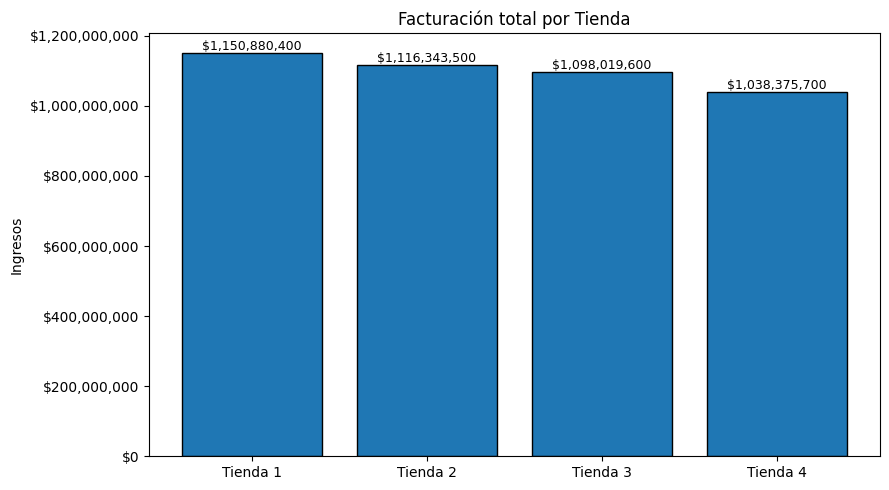

In [102]:
plt.figure(figsize=(9,5))
ax = plt.gca()
ax.yaxis.set_major_formatter(FuncFormatter(lambda y,_: f"${y:,.0f}"))
orden = kpis_tienda.sort_values("ingreso_total", ascending=False)
bars = plt.bar(orden["Tienda"], orden["ingreso_total"], edgecolor="black")
plt.title("Facturación total por Tienda")
plt.ylabel("Ingresos")
for b,v in zip(bars, orden["ingreso_total"]):
    plt.text(b.get_x()+b.get_width()/2, b.get_height(), f"${v:,.0f}", ha="center", va="bottom", fontsize=9)
plt.tight_layout()
plt.show()

**Ingreso vs Costo de envío total vs Ganancía (por tienda)**

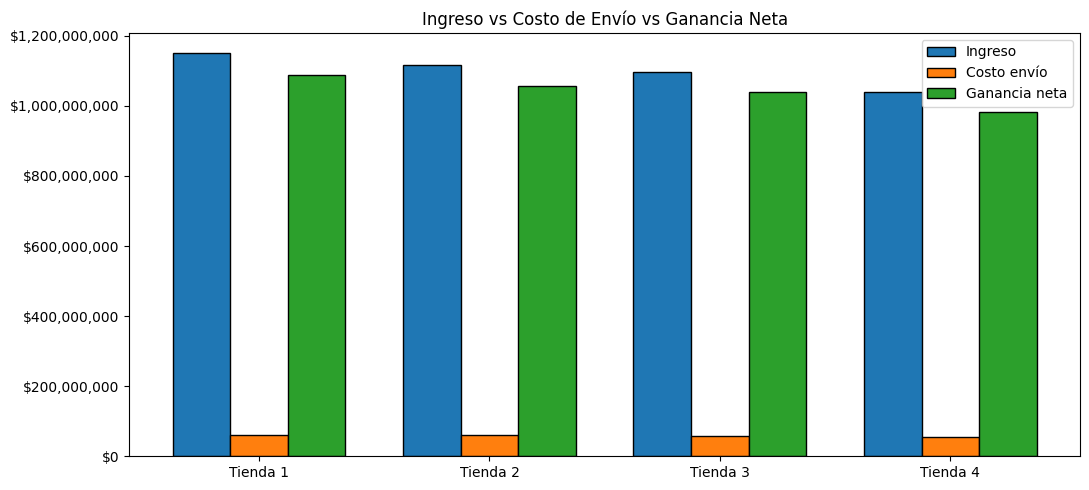

In [103]:
width = 0.25
x = np.arange(len(kpis_tienda))
orden2 = kpis_tienda.sort_values("ingreso_total", ascending=False).reset_index(drop=True)

plt.figure(figsize=(11,5))
ax = plt.gca()
ax.yaxis.set_major_formatter(FuncFormatter(lambda y,_: f"${y:,.0f}"))
plt.bar(x - width, orden2["ingreso_total"], width, label="Ingreso", edgecolor="black")
plt.bar(x,          orden2["costo_envio_total"], width, label="Costo envío", edgecolor="black")
plt.bar(x + width,  orden2["ganancia_neta"], width, label="Ganancia neta", edgecolor="black")
plt.xticks(x, orden2["Tienda"])
plt.title("Ingreso vs Costo de Envío vs Ganancia Neta")
plt.legend()
plt.tight_layout()
plt.show()

**Top 5 categorías por ingreso (por tienda)**

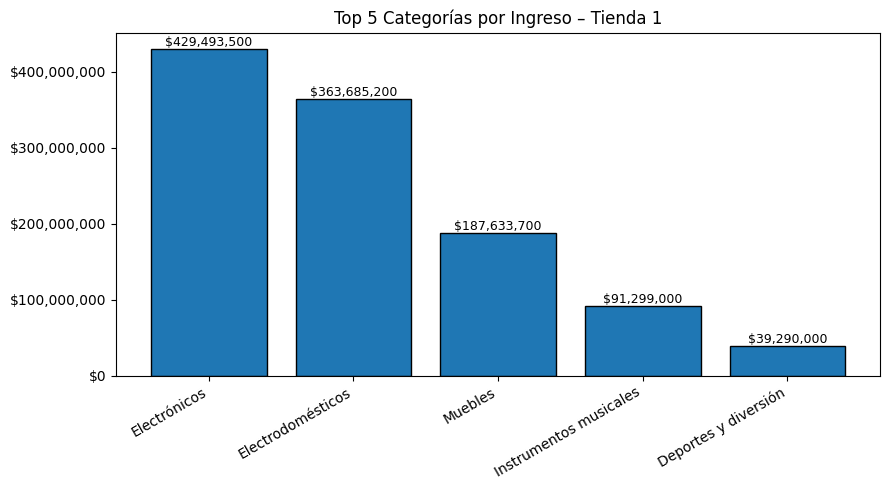

In [104]:
tienda_ej = "Tienda 1"
top5_cat = (cat_resumen[cat_resumen["Tienda"]==tienda_ej]
            .sort_values("ingreso_total", ascending=False)
            .head(5))
plt.figure(figsize=(9,5))
ax = plt.gca()
ax.yaxis.set_major_formatter(FuncFormatter(lambda y,_: f"${y:,.0f}"))
bars = plt.bar(top5_cat["Categoría del Producto"], top5_cat["ingreso_total"], edgecolor="black")
plt.title(f"Top 5 Categorías por Ingreso – {tienda_ej}")
plt.xticks(rotation=30, ha="right")
for b,v in zip(bars, top5_cat["ingreso_total"]):
    plt.text(b.get_x()+b.get_width()/2, b.get_height(), f"${v:,.0f}", ha="center", va="bottom", fontsize=9)
plt.tight_layout()
plt.show()

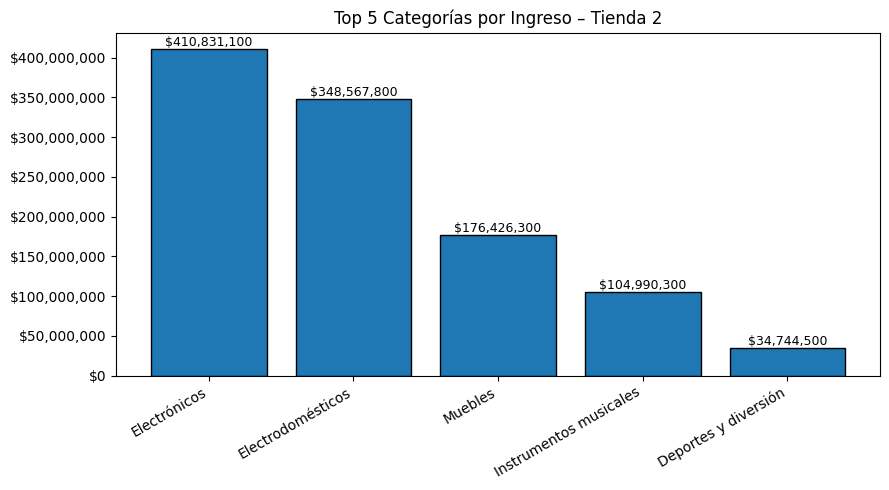

In [105]:
tienda_ej = "Tienda 2"
top5_cat = (cat_resumen[cat_resumen["Tienda"]==tienda_ej]
            .sort_values("ingreso_total", ascending=False)
            .head(5))
plt.figure(figsize=(9,5))
ax = plt.gca()
ax.yaxis.set_major_formatter(FuncFormatter(lambda y,_: f"${y:,.0f}"))
bars = plt.bar(top5_cat["Categoría del Producto"], top5_cat["ingreso_total"], edgecolor="black")
plt.title(f"Top 5 Categorías por Ingreso – {tienda_ej}")
plt.xticks(rotation=30, ha="right")
for b,v in zip(bars, top5_cat["ingreso_total"]):
    plt.text(b.get_x()+b.get_width()/2, b.get_height(), f"${v:,.0f}", ha="center", va="bottom", fontsize=9)
plt.tight_layout()
plt.show()

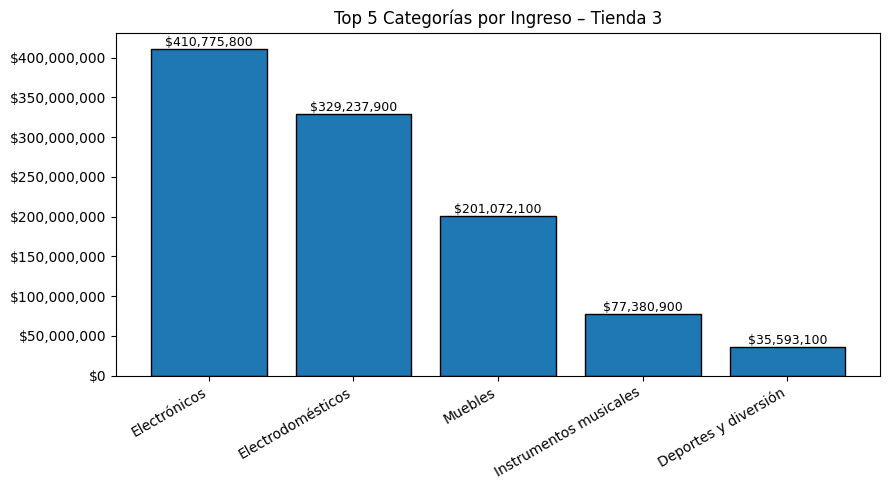

In [106]:
tienda_ej = "Tienda 3"
top5_cat = (cat_resumen[cat_resumen["Tienda"]==tienda_ej]
            .sort_values("ingreso_total", ascending=False)
            .head(5))
plt.figure(figsize=(9,5))
ax = plt.gca()
ax.yaxis.set_major_formatter(FuncFormatter(lambda y,_: f"${y:,.0f}"))
bars = plt.bar(top5_cat["Categoría del Producto"], top5_cat["ingreso_total"], edgecolor="black")
plt.title(f"Top 5 Categorías por Ingreso – {tienda_ej}")
plt.xticks(rotation=30, ha="right")
for b,v in zip(bars, top5_cat["ingreso_total"]):
    plt.text(b.get_x()+b.get_width()/2, b.get_height(), f"${v:,.0f}", ha="center", va="bottom", fontsize=9)
plt.tight_layout()
plt.show()

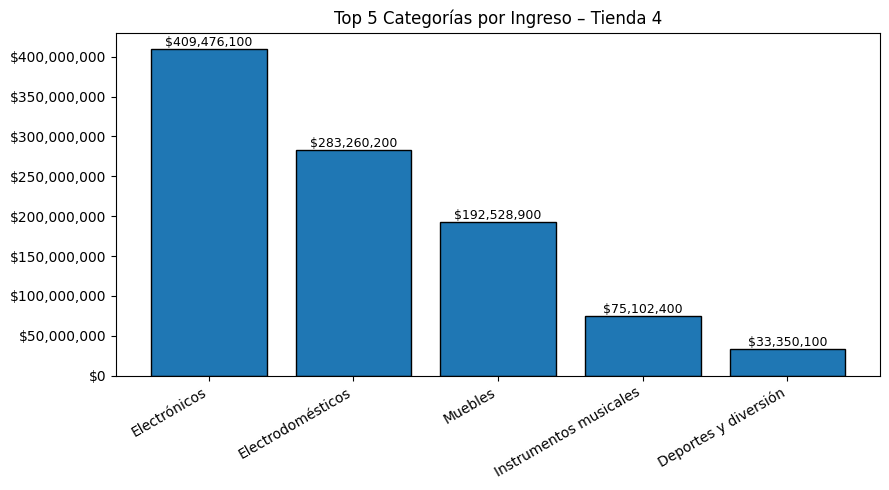

In [107]:
tienda_ej = "Tienda 4"
top5_cat = (cat_resumen[cat_resumen["Tienda"]==tienda_ej]
            .sort_values("ingreso_total", ascending=False)
            .head(5))
plt.figure(figsize=(9,5))
ax = plt.gca()
ax.yaxis.set_major_formatter(FuncFormatter(lambda y,_: f"${y:,.0f}"))
bars = plt.bar(top5_cat["Categoría del Producto"], top5_cat["ingreso_total"], edgecolor="black")
plt.title(f"Top 5 Categorías por Ingreso – {tienda_ej}")
plt.xticks(rotation=30, ha="right")
for b,v in zip(bars, top5_cat["ingreso_total"]):
    plt.text(b.get_x()+b.get_width()/2, b.get_height(), f"${v:,.0f}", ha="center", va="bottom", fontsize=9)
plt.tight_layout()
plt.show()

## **¿Qué tienda es la menos eficiente?**

In [112]:

# Orden para decisión
kpis_rank = kpis_tienda.copy()
kpis_rank = kpis_rank.sort_values(
    by=["ganancia_neta", "calificacion_promedio", "ventas_registros"],
    ascending=[True, True, True]  # menor ganancia, peor calificación, menor volumen
).reset_index(drop=True)

tienda_recomendada = kpis_rank.loc[0, "Tienda"]

# Texto de apoyo con métricas de la tienda recomendada
row = kpis_rank.loc[0]
detalle_recomendacion = {
    "ingreso_total": row["ingreso_total"],
    "costo_envio_total": row["costo_envio_total"],
    "ganancia_neta": row["ganancia_neta"],
    "calificacion_promedio": row["calificacion_promedio"],
    "ventas_registros": int(row["ventas_registros"]),
}

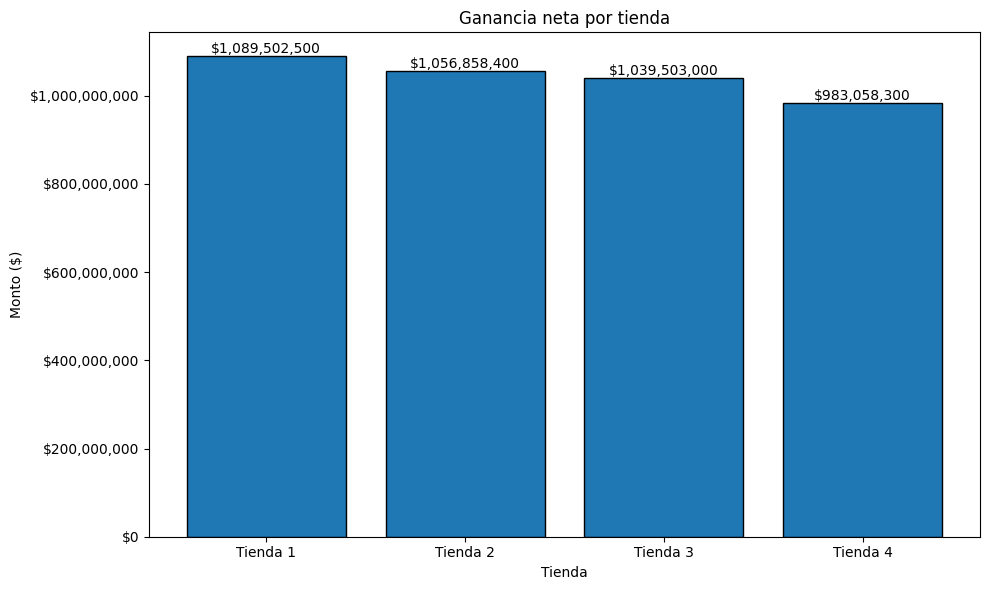

In [113]:
def peso_fmt(x, _):
    return f"${x:,.0f}"

orden = kpis_tienda.sort_values("ganancia_neta", ascending=False)

plt.figure(figsize=(10,6))
ax = plt.gca()
ax.yaxis.set_major_formatter(FuncFormatter(peso_fmt))
bars = plt.bar(orden["Tienda"], orden["ganancia_neta"], edgecolor="black")
plt.title("Ganancia neta por tienda")
plt.ylabel("Monto ($)")
plt.xlabel("Tienda")
plt.xticks(rotation=0)

# Etiquetas encima de cada barra
for b, v in zip(bars, orden["ganancia_neta"]):
    plt.text(b.get_x() + b.get_width()/2, b.get_height(), f"${v:,.0f}",
             ha="center", va="bottom", fontsize=10)

plt.tight_layout()
plt.show()

In [114]:

kpis_legible = kpis_tienda.copy()
for col in ["ingreso_total", "costo_envio_total", "costo_envio_promedio", "ganancia_neta"]:
    kpis_legible[col] = kpis_legible[col].map(lambda x: f"${x:,.2f}")
kpis_legible["calificacion_promedio"] = kpis_legible["calificacion_promedio"].round(2)

print("📊 KPIs por tienda")
display(kpis_legible.sort_values("ganancia_neta", ascending=False))

print("\n✅ Recomendación:")
print(f"- Vender: **{tienda_recomendada}**")
print(f"- Motivo: Menor ganancia neta (≈ ${detalle_recomendacion['ganancia_neta']:,.0f}), "
      f"con calificación promedio {detalle_recomendacion['calificacion_promedio']:.2f} "
      f"y {detalle_recomendacion['ventas_registros']} ventas registradas.")
print("  Esta desinversión libera recursos para el nuevo emprendimiento con el menor impacto en la rentabilidad consolidada.")

📊 KPIs por tienda


,Tienda,ingreso_total,costo_envio_promedio,costo_envio_total,calificacion_promedio,ventas_registros,ganancia_neta
3,Tienda 4,"$1,038,375,700.00","$23,459.46","$55,317,400.00",4.00,2358,"$983,058,300.00"
0,Tienda 1,"$1,150,880,400.00","$26,018.61","$61,377,900.00",3.98,2359,"$1,089,502,500.00"
1,Tienda 2,"$1,116,343,500.00","$25,216.24","$59,485,100.00",4.04,2359,"$1,056,858,400.00"
2,Tienda 3,"$1,098,019,600.00","$24,805.68","$58,516,600.00",4.05,2359,"$1,039,503,000.00"



✅ Recomendación:
- Vender: **Tienda 4**
- Motivo: Menor ganancia neta (≈ $983,058,300), con calificación promedio 4.00 y 2358 ventas registradas.
  Esta desinversión libera recursos para el nuevo emprendimiento con el menor impacto en la rentabilidad consolidada.
